**1. Introduction**



As I am in the initial stages of developing my data science and singer-songwriting careers, I thought it would be appropriate to bring both fields together to inform my analysis and songwriting skills. For this short project, I will be predicting the popularity of songs based purely on song metrics such as key, dancibility, and acousticness. Year, artist, era, and genre will not be included.


**2. Import Packages**

In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/zaheenhamidani/ultimate-spotify-tracks-db")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: devinab
Your Kaggle Key: ··········


100%|██████████| 15.5M/15.5M [00:00<00:00, 66.4MB/s]


In [ ]:
import numpy as np
import pandas as pd # for working with dataframes
import seaborn as sns # for data visualization

from matplotlib import pyplot as plt # for plotting
%matplotlib inline
sns.set_style("whitegrid")

import warnings # http://blog.johnmuellerbooks.com/2015/11/30/warnings-in-python-and-anaconda/
warnings.filterwarnings("ignore")

**3. Loading and Viewing Dataset**

We load the dataset and look at the overall statistics such as mean, count, and median.

In [ ]:
dataframe = pd.read_csv('ultimate-spotify-tracks-db/SpotifyFeatures.csv')
dataframe.head()

genre        artist_name                        track_name  \
0  Movie     Henri Salvador       C'est beau de faire un Show   
1  Movie  Martin & les fées  Perdu d'avance (par Gad Elmaleh)   
2  Movie    Joseph Williams    Don't Let Me Be Lonely Tonight   
3  Movie     Henri Salvador    Dis-moi Monsieur Gordon Cooper   
4  Movie       Fabien Nataf                         Ouverture   

                 track_id  popularity  acousticness  danceability  \
0  0BRjO6ga9RKCKjfDqeFgWV           0         0.611         0.389   
1  0BjC1NfoEOOusryehmNudP           1         0.246         0.590   
2  0CoSDzoNIKCRs124s9uTVy           3         0.952         0.663   
3  0Gc6TVm52BwZD07Ki6tIvf           0         0.703         0.240   
4  0IuslXpMROHdEPvSl1fTQK           4         0.950         0.331   

   duration_ms  energy  instrumentalness key  liveness  loudness   mode  \
0        99373   0.910             0.000  C#    0.3460    -1.828  Major   
1       137373   0.737             0.000  F#    0.1510    -5.559  Minor   
2       170267   0.131             0.000   C    0.1030   -13.879  Minor   
3       152427   0.326             0.000  C#    0.0985   -12.178  Major   
4        82625   0.225             0.123   F    0.2020   -21.150  Major   

   speechiness    tempo time_signature  valence  
0       0.0525  166.969            4/4    0.814  
1       0.0868  174.003            4/4    0.816  
2       0.0362   99.488            5/4    0.368  
3       0.0395  171.758            4/4    0.227  
4       0.0456  140.576            4/4    0.390

In [ ]:
import numpy as np

popularity = dataframe['popularity']
percentile_25 = np.percentile(popularity, 80)
print(percentile_25)

57.0


In [ ]:
dataframe.describe()

popularity   acousticness      ...                tempo        valence
count  228159.000000  228159.000000      ...        228159.000000  228159.000000
mean       44.209130       0.351200      ...           117.423062       0.444795
std        17.276599       0.351385      ...            30.712458       0.255397
min         0.000000       0.000001      ...            30.379000       0.000000
25%        33.000000       0.030900      ...            92.734000       0.232000
50%        47.000000       0.205000      ...           115.347000       0.430000
75%        57.000000       0.689000      ...           138.887000       0.643000
max       100.000000       0.996000      ...           239.848000       1.000000

[8 rows x 11 columns]

In [ ]:
print(dataframe.keys())

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')


A link to the definitions of these features is shown here: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

**4. Cleaning NaN Values**

We check for null values.

In [ ]:
pd.isnull(dataframe).sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

Since there are no null values, we don't have to worry about filling in missing information.

**5. Exploratory Analysis**

We investigate overall trends in the data to get a good idea of which variables correlate with each other as well as other associations.

Text(0.5, 1.0, 'Popularity Distribution')

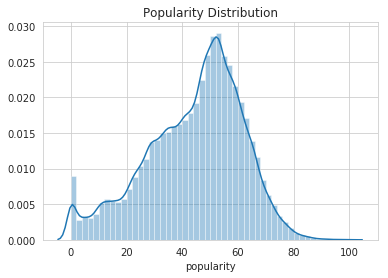

In [ ]:
sns.distplot(dataframe['popularity']).set_title('Popularity Distribution')

In [ ]:
dataframe.corr()

popularity  acousticness    ...        tempo   valence
popularity          1.000000     -0.422083    ...     0.114957  0.119224
acousticness       -0.422083      1.000000    ...    -0.241385 -0.335430
danceability        0.294233     -0.379441    ...     0.018950  0.542405
duration_ms        -0.041150      0.035410    ...    -0.027957 -0.135970
energy              0.277652     -0.723150    ...     0.228067  0.449463
instrumentalness   -0.230042      0.323748    ...    -0.108424 -0.301990
liveness           -0.203147      0.086149    ...    -0.055556  0.018264
loudness            0.413276     -0.698187    ...     0.229110  0.407057
speechiness        -0.194673      0.165105    ...    -0.085619  0.035007
tempo               0.114957     -0.241385    ...     1.000000  0.120573
valence             0.119224     -0.335430    ...     0.120573  1.000000

[11 rows x 11 columns]

Text(0.5, 1.0, 'Popularity Based on Time Signature')

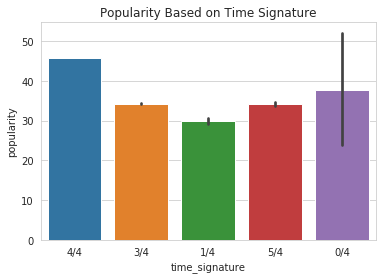

In [ ]:
sns.barplot(x = 'time_signature', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Time Signature')

Text(0.5, 1.0, 'Popularity Based on Key')

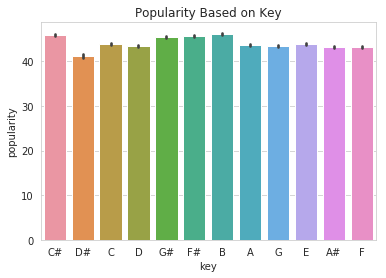

In [ ]:
sns.barplot(x = 'key', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Key')

Text(0.5, 1.0, 'Popularity Based on Mode')

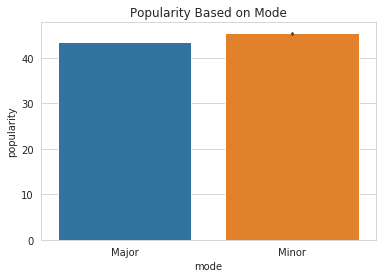

In [ ]:
sns.barplot(x = 'mode', y = 'popularity', data = dataframe)
plt.title('Popularity Based on Mode')

Since key and mode are related (there can be A major or A minor), we combine those two features in another barplot using "hue".

Text(0.5, 1.0, 'Popularity Based on Mode and Key')

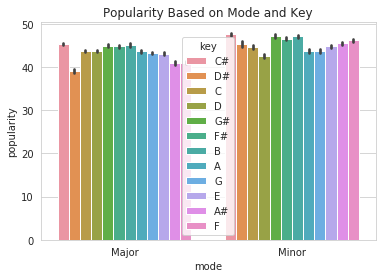

In [ ]:
sns.barplot(x = 'mode', y = 'popularity', hue = 'key', data = dataframe)
plt.title('Popularity Based on Mode and Key')

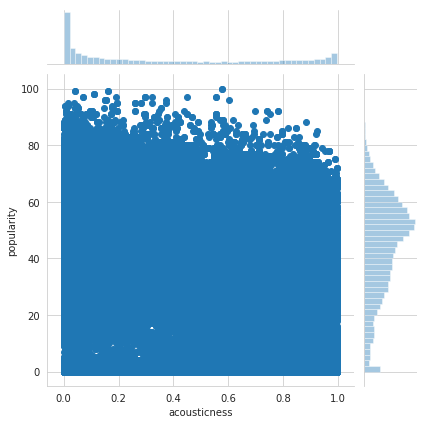

In [ ]:
sns.jointplot(x = 'acousticness', y = 'popularity', data = dataframe)

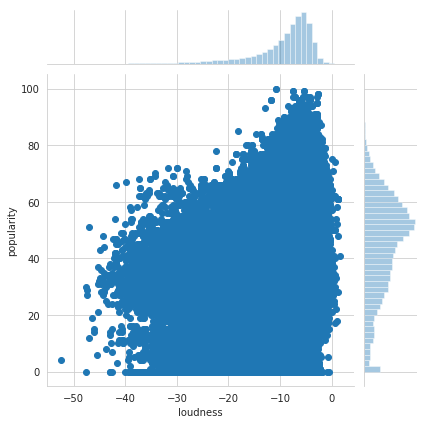

In [ ]:
sns.jointplot(x = 'loudness', y = 'popularity', data = dataframe)

Text(0.5, 1.0, 'Acoustiness for Songs with More than 50 Popularity')

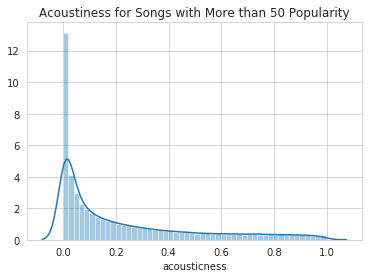

In [ ]:
popular_above_50 = dataframe[dataframe.popularity > 50]
sns.distplot(popular_above_50['acousticness'])
plt.title('Acoustiness for Songs with More than 50 Popularity')

Text(0.5, 1.0, 'Acoustiness for Songs with Less than 50 Popularity')

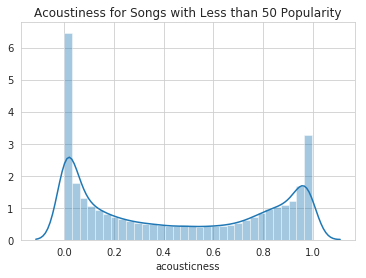

In [ ]:
popular_below_50 = dataframe[dataframe.popularity < 50]
sns.distplot(popular_below_50['acousticness'])
plt.title('Acoustiness for Songs with Less than 50 Popularity')

Text(0.5, 1.0, 'Loudness for Songs with More than 50 Popularity')

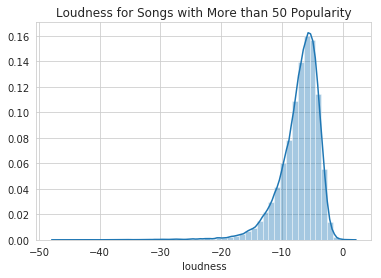

In [ ]:
sns.distplot(popular_above_50['loudness'])
plt.title('Loudness for Songs with More than 50 Popularity')


Text(0.5, 1.0, 'Loudness for Songs with Less than 50 Popularity')

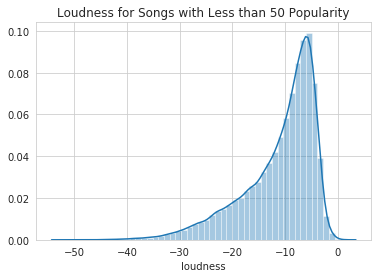

In [ ]:
popular_below_50 = dataframe[dataframe.popularity < 50]
sns.distplot(popular_below_50['loudness'])
plt.title('Loudness for Songs with Less than 50 Popularity')

From this analysis, there loudness" and acousticness features have medium-weak correlations with popularity. Furthermore, the distributions of loudness and acousticness differ for songs with more than 50 popularity vs. songs with less than 50 popularity. We plot a summary of all relationships between the features.

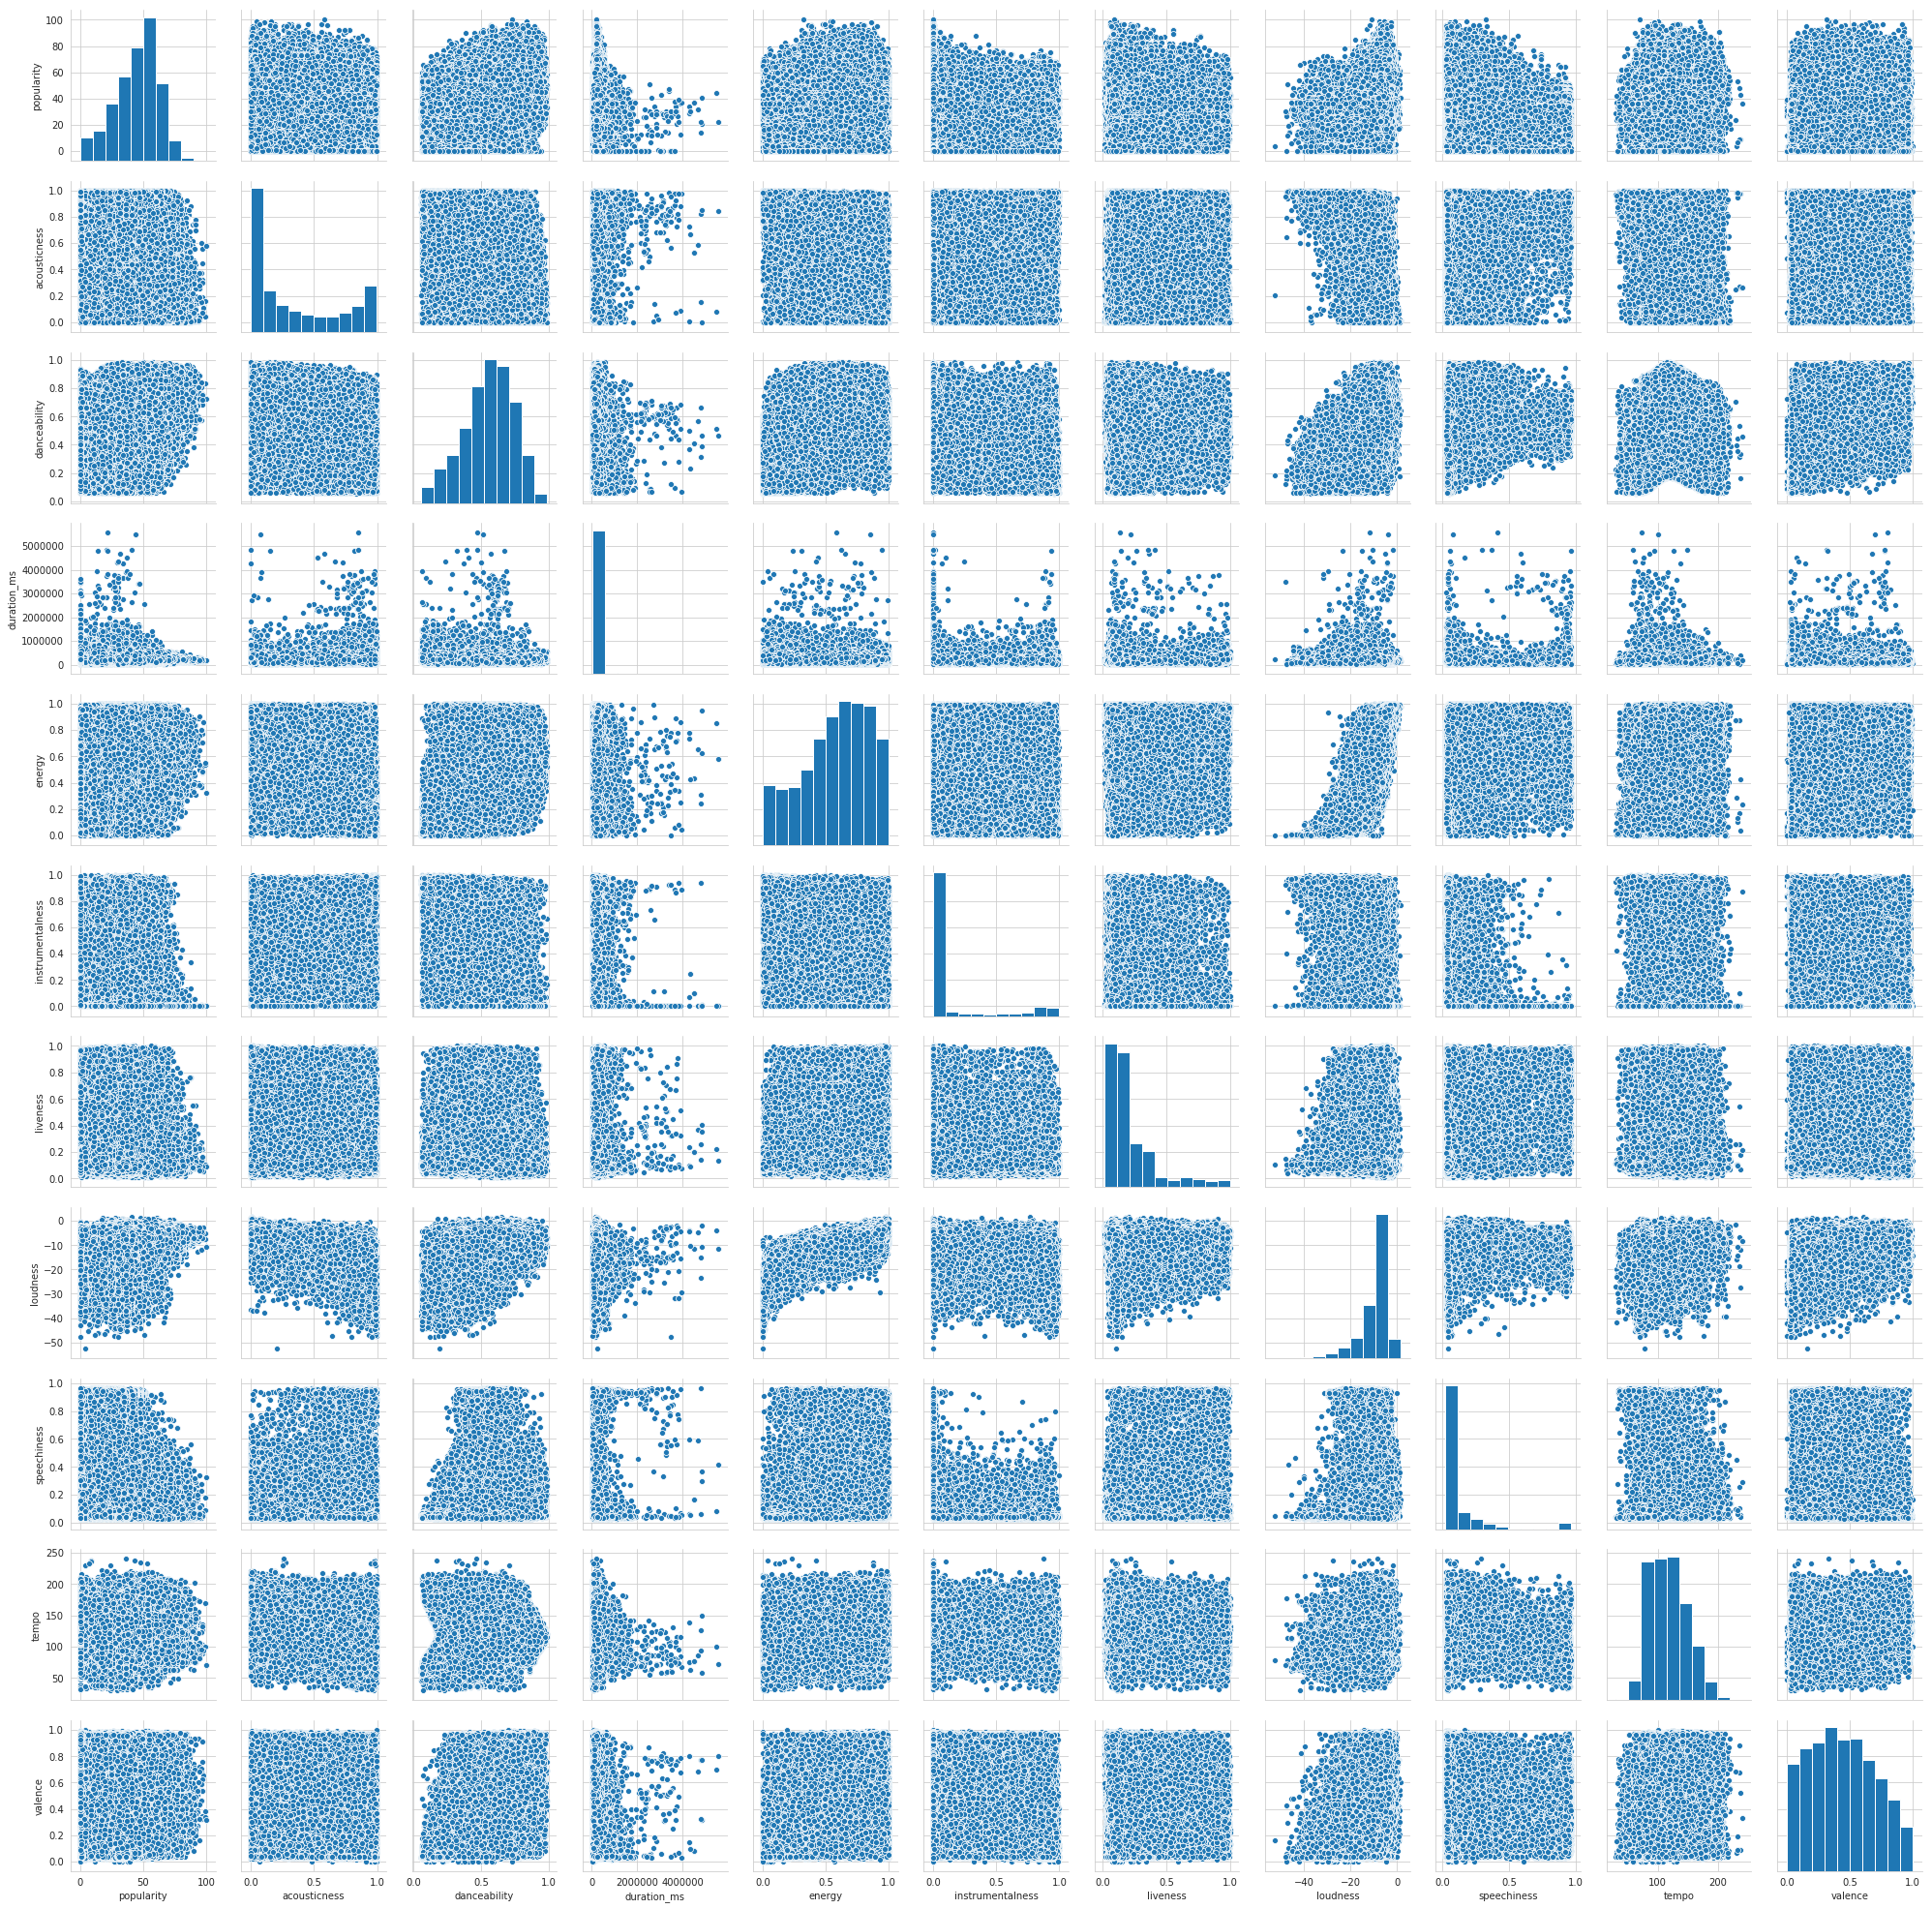

In [ ]:
 sns.pairplot(dataframe)

 **6. Feature Engineering**

There are 3 categorical variables (key, mode, and time signature) that need to be converted from text to numbers using one-hot-encoding. We also define popularity as a binary variable. For our purposes, we will define above 57 as "popular" since that's the border of the top 25% of songs and encode that as 1, and below 75 as "not popular" and encode that as 0.

**Key**: Since there are 12 letter keys (not distinguishing between major and minor), we will convert A to 0, A# to 1, and so on and so forth until B is 12.

In [ ]:
list_of_keys = dataframe['key'].unique()
for i in range(len(list_of_keys)):
    dataframe.loc[dataframe['key'] == list_of_keys[i], 'key'] = i
dataframe.sample(5)

genre     artist_name   ...   time_signature valence
99270         Rap        DeJ Loaf   ...              4/4   0.287
203702      World  Casting Crowns   ...              4/4   0.267
201974      World   Cesaria Evora   ...              4/4   0.458
161241  Reggaeton           Guaco   ...              4/4   0.861
63778         R&B      Leven Kali   ...              4/4   0.508

[5 rows x 18 columns]

**Mode**: We will assign major = 1 and minor = 0.


In [ ]:
dataframe.loc[dataframe["mode"] == 'Major', "mode"] = 1
dataframe.loc[dataframe["mode"] == 'Minor', "mode"] = 0
dataframe.sample(5)


genre           artist_name   ...   time_signature valence
43586   Children’s Music         Glass Animals   ...              4/4   0.259
90633   Children’s Music  Two Door Cinema Club   ...              4/4   0.593
25786        Alternative     Cultura Profética   ...              4/4   0.666
20998        Alternative             Lifehouse   ...              4/4   0.527
183011              Jazz        Tal Wilkenfeld   ...              4/4   0.257

[5 rows x 18 columns]

In [ ]:
list_of_time_signatures = dataframe['time_signature'].unique()
for i in range(len(list_of_time_signatures)):
    dataframe.loc[dataframe['time_signature'] == list_of_time_signatures[i], 'time_signature'] = i
dataframe.sample(5)

genre   ...   valence
104430            Reggae   ...     0.480
153086           Country   ...     0.262
166359              Rock   ...     0.540
91090   Children’s Music   ...     0.908
134624            Reggae   ...     0.713

[5 rows x 18 columns]

**Popularity**

In [ ]:
import numpy as np

popularity = dataframe['popularity']
percentile_25 = np.percentile(popularity, 75)
print(percentile_25)

NameError: ignored

In [ ]:
dataframe.loc[dataframe['popularity'] < 57, 'popularity'] = 0
dataframe.loc[dataframe['popularity'] >= 57, 'popularity'] = 1
dataframe.loc[dataframe['popularity'] == 1]


genre                artist_name   ...   time_signature valence
242     Alternative                       Joji   ...                0  0.2840
243     Alternative                   YUNGBLUD   ...                0  0.2330
244     Alternative                     H.E.R.   ...                0  0.4130
245     Alternative                       Joji   ...                0  0.2040
246     Alternative                     H.E.R.   ...                0  0.3990
247     Alternative                       Joji   ...                0  0.8440
248     Alternative                      6LACK   ...                0  0.2230
249     Alternative              lovelytheband   ...                0  0.5100
250     Alternative                       Joji   ...                0  0.4660
251     Alternative                Smash Mouth   ...                0  0.7800
252     Alternative                   Gorillaz   ...                0  0.7720
253     Alternative          The Neighbourhood   ...                0  0.3980
254     Alternative      Red Hot Chili Peppers   ...                0  0.4580
255     Alternative              Summer Walker   ...                0  0.1230
256     Alternative              Summer Walker   ...                0  0.0897
257     Alternative                       Joji   ...                0  0.4250
258           Blues                       COIN   ...                0  0.5040
259           Blues              Bishop Briggs   ...                0  0.3380
260           Blues              Lewis Del Mar   ...                0  0.3380
261           Blues               The Mowgli's   ...                0  0.2930
263           Blues                      BANKS   ...                0  0.2250
264           Blues               Rise Against   ...                0  0.5820
265           Blues  Catfish and the Bottlemen   ...                0  0.2790
266           Blues              Chris Cornell   ...                0  0.2950
267           Blues                     Gojira   ...                0  0.4950
268           Blues             As I Lay Dying   ...                0  0.0394
269           Blues            Alice In Chains   ...                0  0.2670
270           Blues          Black Pistol Fire   ...                0  0.4180
272           Blues                    Big Pun   ...                0  0.5220
273           Blues    Queens of the Stone Age   ...                0  0.8970
...             ...                        ...   ...              ...     ...
219436          Ska              Los Caligaris   ...                0  0.9450
219455          Ska  Los Auténticos Decadentes   ...                0  0.8090
219462          Ska                Soda Stereo   ...                0  0.6130
219463          Ska                Soda Stereo   ...                0  0.7150
219480          Ska                Nonpalidece   ...                0  0.7700
219505          Ska    Los Fabulosos Cadillacs   ...                0  0.7330
219514          Ska                Los Pericos   ...                0  0.3870
219518          Ska                Soda Stereo   ...                1  0.1180
219520          Ska                Soda Stereo   ...                0  0.2660
219526          Ska                Tijuana No!   ...                0  0.3300
219529          Ska          Los Estramboticos   ...                0  0.7640
219548          Ska                Nonpalidece   ...                0  0.8200
219556          Ska                Los Pericos   ...                1  0.9490
219557          Ska    Los Fabulosos Cadillacs   ...                0  0.7150
219566          Ska                Los Pericos   ...                0  0.7830
219599          Ska  Los Auténticos Decadentes   ...                0  0.8610
219600          Ska    Los Fabulosos Cadillacs   ...                0  0.8230
219640          Ska             Panteon Rococo   ...                0  0.4910
219649          Ska    Los Fabulosos Cadillacs   ...                0  0.9570
219687          Ska                 

**7. Model Fitting and Predicting**

We will use the same models as seen in a previous study on predicting song similarity: https://towardsdatascience.com/song-popularity-predictor-1ef69735e380. For simplicity and using binary classification, we define as the top 25% popular songs as "popular", and the bottom 75% popular songs as "not popular".  

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


For feature selection, we will select the following features which are only based on music theory and not artist/song information: acousticness, danceability, duration_ms, energy, instrumentalness, key, liveliness, loudness, mode, speeciness, tempo, time_signature, and valence.

In [ ]:
features = ["acousticness", "danceability", "duration_ms", "energy", "instrumentalness", "key", "liveness",
            "mode", "speechiness", "tempo", "time_signature", "valence"]

Next we define 80% of the dataframe for training and 20% of the dataframe for testing.

In [ ]:
training = dataframe.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = dataframe.drop(training.index)[features]

We add a validation dataset using train_test_split.

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

**Logistic Regression**

In [ ]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(y_valid, LR_Predict)
print("AUC: " + str(LR_AUC))

Accuracy: 0.7497945543198379
AUC: 0.5


**Random Forest Classifier**

In [ ]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict)
print("AUC: " + str(RFC_AUC))

Accuracy: 0.9205336109132746
AUC: 0.8641031987700236


**K-Nearest Neighbors Classifier**

In [ ]:
KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_valid)
KNN_Accuracy = accuracy_score(y_valid, KNN_Predict)
print("Accuracy: " + str(KNN_Accuracy))

KNN_AUC = roc_auc_score(y_valid, KNN_Predict)
print("AUC: " + str(KNN_AUC))

Accuracy: 0.7764750999835643
AUC: 0.6891817633896552


**Decision Tree Classifier**

In [ ]:
DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_valid)
DT_Accuracy = accuracy_score(y_valid, DT_Predict)
print("Accuracy: " + str(DT_Accuracy))

DT_AUC = roc_auc_score(y_valid, DT_Predict)
print("AUC: " + str(DT_AUC))

Accuracy: 0.8750616337040487
AUC: 0.8584364539963084


**Linear Support Vector Classification**

Since LSVC is O(n^3), and the training data set has 182,000 datapoints, it would take 10^15 operations to train the model. Therefore we will only use 10000 datapoints total.

In [ ]:
training_LSVC = training.sample(10000)
X_train_LSVC = training_LSVC[features]
y_train_LSVC = training_LSVC['popularity']
X_test_LSVC = dataframe.drop(training_LSVC.index)[features]
X_train_LSVC, X_valid_LSVC, y_train_LSVC, y_valid_LSVC = train_test_split(
    X_train_LSVC, y_train_LSVC, test_size = 0.2, random_state = 420)


In [ ]:
LSVC_Model = DecisionTreeClassifier()
LSVC_Model.fit(X_train_LSVC, y_train_LSVC)
LSVC_Predict = LSVC_Model.predict(X_valid_LSVC)
LSVC_Accuracy = accuracy_score(y_valid_LSVC, LSVC_Predict)
print("Accuracy: " + str(LSVC_Accuracy))

LSVC_AUC = roc_auc_score(y_valid_LSVC, LSVC_Predict)
print("AUC: " + str(LSVC_AUC))

Accuracy: 0.69
AUC: 0.5847764816775457


**XGBOOST**

In [ ]:
XGB_Model = XGBClassifier(objective = "binary:logistic", n_estimators = 10, seed = 123)
XGB_Model.fit(X_train, y_train)
XGB_Predict = XGB_Model.predict(X_valid)
XGB_Accuracy = accuracy_score(y_valid, XGB_Predict)
print("Accuracy: " + str(XGB_Accuracy))

XGB_AUC = roc_auc_score(y_valid, XGB_Predict)
print("AUC: " + str(XGB_AUC))

Accuracy: 0.7497945543198379
AUC: 0.5


**8. Model Performance Summary**

In [ ]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression',
                                                      'RandomForestClassifier',
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      'LinearSVC',
                                                      'XGBClassifier'],
                                            'Accuracy': [LR_Accuracy,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy,
                                                         LSVC_Accuracy,
                                                         XGB_Accuracy]})

model_performance_AUC = pd.DataFrame({'Model': ['LogisticRegression',
                                                      'RandomForestClassifier',
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      'LinearSVC',
                                                      'XGBClassifier'],
                                            'AUC': [LR_AUC,
                                                         RFC_AUC,
                                                         KNN_AUC,
                                                         DT_AUC,
                                                         LSVC_AUC,
                                                         XGB_AUC]})

In [ ]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

Model  Accuracy
1  RandomForestClassifier  0.920534
3  DecisionTreeClassifier  0.875062
2    KNeighborsClassifier  0.776475
0      LogisticRegression  0.749795
5           XGBClassifier  0.749795
4               LinearSVC  0.690000

In [ ]:
model_performance_AUC.sort_values(by = "AUC", ascending = False)

Model       AUC
1  RandomForestClassifier  0.864103
3  DecisionTreeClassifier  0.858436
2    KNeighborsClassifier  0.689182
4               LinearSVC  0.584776
0      LogisticRegression  0.500000
5           XGBClassifier  0.500000

**9. Conclusion**

Using a dataset of 228,000 Spotify Tracks, we were able to predict popularity (greater than 57 popularity) using audio-based metrics such as key, mode, and danceability without external metrics such as artist name, genre, and release date. The Random Forest Classifier was the best performing algorithm with 92.0% accuracy and 86.4% AUC. The Decision Tree Classifier was the second best performing algorithm with 87.5% accuracy and 85.8% AUC.

Moving forward, I will use a larger Spotify database by using the Spotify API to collect my own data, and explore different algorithms to predict popularity score rather than doing binary classification.

**10. References**

1. Cher Lau-Cher Lau - https://towardsdatascience.com/5-steps-of-a-data-science-project-lifecycle-26c50372b492
2. Are Hit Songs Becoming Less Musically Diverse?
Andrew Thompson-Matt Daniels-Damián Gaume - https://pudding.cool/2018/05/similarity/
3. Song Popularity Predictor
Mohamed Nasreldin-Mohamed Nasreldin - https://towardsdatascience.com/song-popularity-predictor-1ef69735e380
4. Titanic: Beginner's Guide with Sklearn
https://www.kaggle.com/ialimustafa/titanic-beginner-s-guide-with-sklearn/data
5. **Data Source:** https://www.kaggle.com/zaheenhamidani/ultimate-spotify-tracks-db#SpotifyFeatures.csv